In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
#     fig.canvas.draw()
#     plt.show()

# 1) ConvNet with 3 x3 kernel

## 1.1) ConvNet(32-64) | 2 Dropouts | Maxpool | Dense(128-10) | 1 Flatten | ReLU | Adadelta

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 48s 794us/step - loss: 0.2667 - accuracy: 0.9190 - val_loss: 0.0583 - val_accuracy: 0.9817
Epoch 2/12
60000/60000 [==============================] - 49s 811us/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0395 - val_accuracy: 0.9857
Epoch 3/12
60000/60000 [==============================] - 47s 785us/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0358 - val_accuracy: 0.9878
Epoch 4/12
60000/60000 [==============================] - 48s 793us/step - loss: 0.0536 - accuracy: 0.9839 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 5/12
60000/60000 [==============================] - 49s 815us/step - loss: 0.0478 - accuracy: 0.9860 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 6/12
60000/60000 [==============================] - 48s 803us/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.0277 - val_accuracy: 0.9902
Epoch 7/12
60000/60000 [==============================] 

In [18]:
history.history['val_loss']

[0.058340036510489884,
 0.03950693163461983,
 0.035849299174919726,
 0.030375180654320866,
 0.03146639704736881,
 0.02769776120893657,
 0.027960741236479954,
 0.03204326269463636,
 0.024335926883982027,
 0.02840736617653456,
 0.024061167104181366,
 0.028938813609300996]

<IPython.core.display.Javascript object>


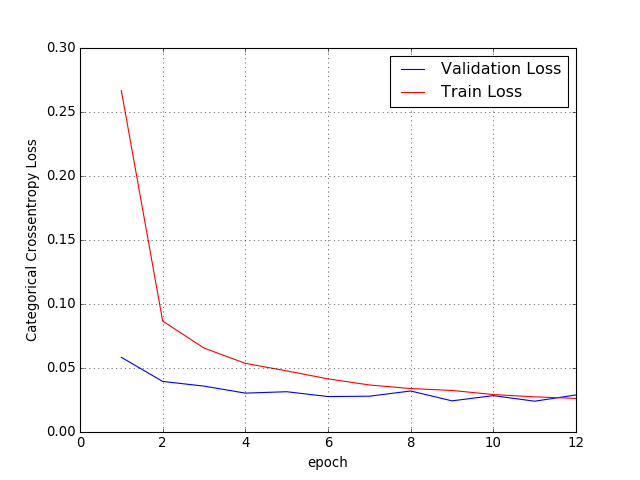

In [19]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 1.2) ConvNet(32-32-64) | 1 Dropouts | 3 MaxPools | Dense(64-10) |1 Flatten | ReLU | Adam

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.5875 - accuracy: 0.8144 - val_loss: 0.1185 - val_accuracy: 0.9638
Epoch 2/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.2047 - accuracy: 0.9418 - val_loss: 0.0966 - val_accuracy: 0.9702
Epoch 3/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.1527 - accuracy: 0.9571 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 4/12
60000/60000 [==============================] - 12s 208us/step - loss: 0.1269 - accuracy: 0.9650 - val_loss: 0.0766 - val_accuracy: 0.9782
Epoch 5/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.1090 - accuracy: 0.9701 - val_loss: 0.0612 - val_accuracy: 0.9828
Epoch 6/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.0941 - accuracy: 0.9734 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 7/12
60000/60000 [==============================] 

Test loss: 0.06079796881068669
Test accuracy: 0.9843999743461609


<IPython.core.display.Javascript object>


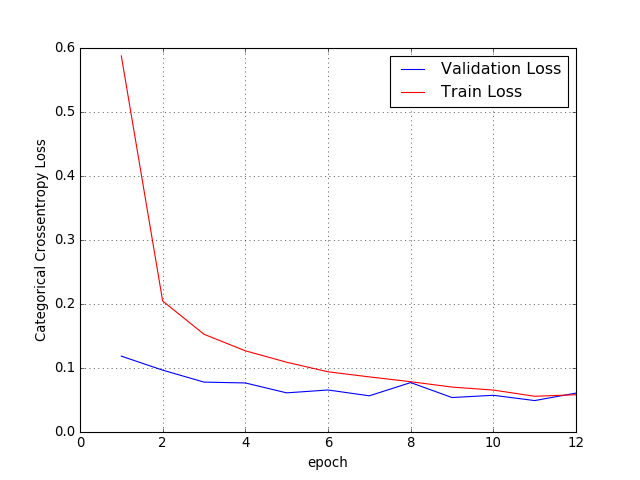

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 1.3: ConvNet(32-64) | 2 Dropouts | 2 MaxPools | Dense(128-10) | 1 Flatten | ReLU | Adam | Padding: "same"

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 307us/step - loss: 0.3029 - accuracy: 0.9059 - val_loss: 0.0620 - val_accuracy: 0.9798
Epoch 2/12
60000/60000 [==============================] - 18s 303us/step - loss: 0.1020 - accuracy: 0.9698 - val_loss: 0.0418 - val_accuracy: 0.9856
Epoch 3/12
60000/60000 [==============================] - 18s 305us/step - loss: 0.0766 - accuracy: 0.9768 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 4/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.0623 - accuracy: 0.9808 - val_loss: 0.0298 - val_accuracy: 0.9888
Epoch 5/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.0540 - accuracy: 0.9835 - val_loss: 0.0263 - val_accuracy: 0.9907
Epoch 6/12
60000/60000 [==============================] - 18s 306us/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 7/12
60000/60000 [==============================] 

Test loss: 0.021854717017415988
Test accuracy: 0.993399977684021


<IPython.core.display.Javascript object>


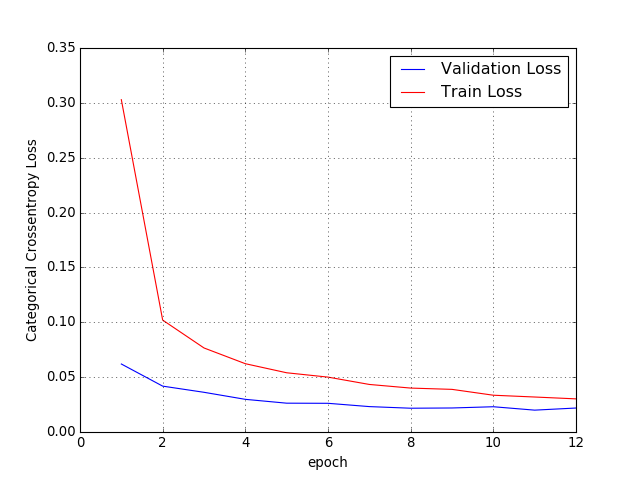

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 1.4: ConvNet(32-32) | 2 Dropouts | 2 MaxPools | Dense(64-10) | 1 Flatten | ReLU | Adam | Padding: "same" | Batch Normalization

In [8]:
from keras.layers import BatchNormalization

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 250us/step - loss: 0.4205 - accuracy: 0.8844 - val_loss: 0.0705 - val_accuracy: 0.9819
Epoch 2/12
60000/60000 [==============================] - 14s 236us/step - loss: 0.1329 - accuracy: 0.9644 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 3/12
60000/60000 [==============================] - 14s 234us/step - loss: 0.0975 - accuracy: 0.9728 - val_loss: 0.0338 - val_accuracy: 0.9881
Epoch 4/12
60000/60000 [==============================] - 14s 235us/step - loss: 0.0849 - accuracy: 0.9754 - val_loss: 0.0269 - val_accuracy: 0.9915
Epoch 5/12
60000/60000 [==============================] - 14s 234us/step - loss: 0.0723 - accuracy: 0.9797 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 6/12
60000/60000 [==============================] - 14s 241us/step - loss: 0.0640 - accuracy: 0.9816 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 7/12
60000/60000 [==============================] 

Test loss: 0.02282937448550165
Test accuracy: 0.993399977684021


<IPython.core.display.Javascript object>


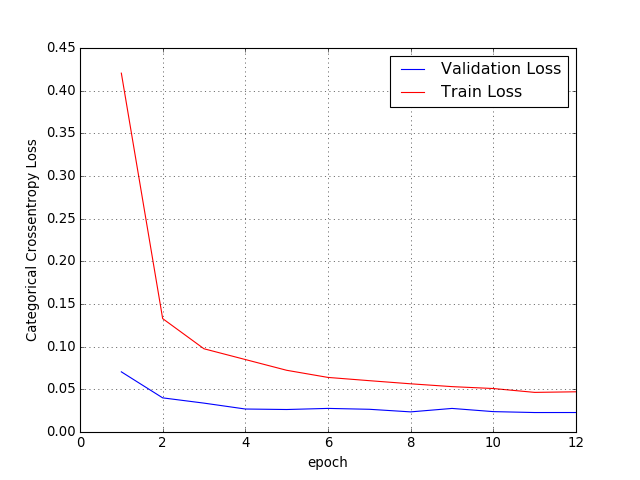

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2) ConvNet with 5 x 5 kernel

## 2.1: ConvNet(128-64-32) | 3 Dropouts | 2 Maxpool | Dense(128-10) | 1 Flatten | ReLU | Adam

In [10]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 257s 4ms/step - loss: 0.4465 - accuracy: 0.8522 - val_loss: 0.0515 - val_accuracy: 0.9845
Epoch 2/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.1272 - accuracy: 0.9619 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 3/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0994 - accuracy: 0.9710 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 4/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0774 - accuracy: 0.9771 - val_loss: 0.0232 - val_accuracy: 0.9931
Epoch 5/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0669 - accuracy: 0.9806 - val_loss: 0.0219 - val_accuracy: 0.9934
Epoch 6/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0625 - accuracy: 0.9823 - val_loss: 0.0210 - val_accuracy: 0.9929
Epoch 7/12
60000/60000 [==============================] - 264s

Test loss: 0.018588077808042364
Test accuracy: 0.9944000244140625


<IPython.core.display.Javascript object>


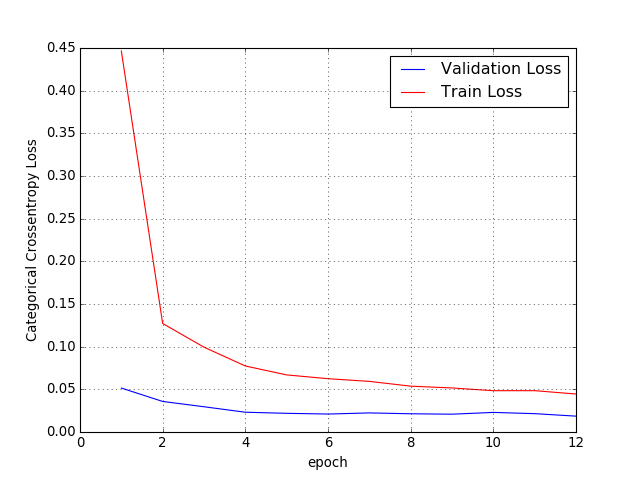

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2.2: ConvNet(64-32) | 3 Dropouts | 3 MaxPools | Dense(128-32) | 1 Flatten | ReLU | Adam

In [12]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(5, 5), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 412us/step - loss: 0.6901 - accuracy: 0.7758 - val_loss: 0.0829 - val_accuracy: 0.9776
Epoch 2/12
60000/60000 [==============================] - 24s 404us/step - loss: 0.2150 - accuracy: 0.9410 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 3/12
60000/60000 [==============================] - 24s 402us/step - loss: 0.1616 - accuracy: 0.9573 - val_loss: 0.0455 - val_accuracy: 0.9887
Epoch 4/12
60000/60000 [==============================] - 24s 403us/step - loss: 0.1287 - accuracy: 0.9653 - val_loss: 0.0418 - val_accuracy: 0.9901
Epoch 5/12
60000/60000 [==============================] - 24s 405us/step - loss: 0.1160 - accuracy: 0.9690 - val_loss: 0.0430 - val_accuracy: 0.9890
Epoch 6/12
60000/60000 [==============================] - 25s 410us/step - loss: 0.1003 - accuracy: 0.9725 - val_loss: 0.0315 - val_accuracy: 0.9920
Epoch 7/12
60000/60000 [==============================] 

Test loss: 0.03562645074729423
Test accuracy: 0.9918000102043152


<IPython.core.display.Javascript object>


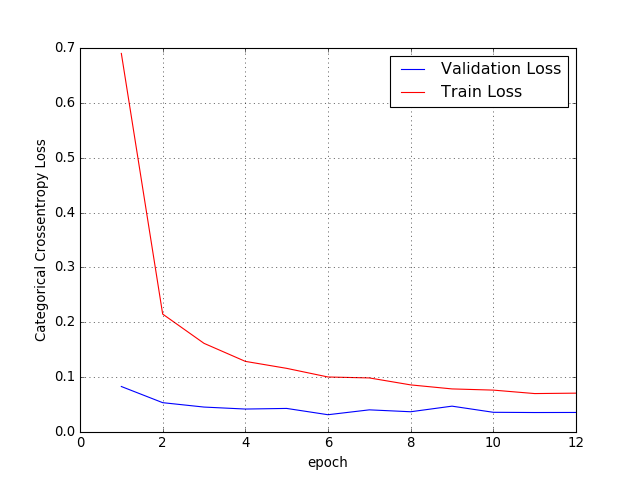

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2.3: ConvNet(128-64-32) | 3 Dropouts | 3 MaxPools | Dense(64-32) | 1 Flatten | ReLU | Adam | Padding: "same"

In [18]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (5, 5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.9753 - accuracy: 0.6654 - val_loss: 0.0959 - val_accuracy: 0.9736
Epoch 2/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.3063 - accuracy: 0.9153 - val_loss: 0.0684 - val_accuracy: 0.9830
Epoch 3/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.2286 - accuracy: 0.9386 - val_loss: 0.0487 - val_accuracy: 0.9873
Epoch 4/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1958 - accuracy: 0.9506 - val_loss: 0.0422 - val_accuracy: 0.9896
Epoch 5/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1675 - accuracy: 0.9560 - val_loss: 0.0353 - val_accuracy: 0.9917
Epoch 6/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1529 - accuracy: 0.9603 - val_loss: 0.0353 - val_accuracy: 0.9920
Epoch 7/12
60000/60000 [==============================] - 152s

Test loss: 0.03410061263831351
Test accuracy: 0.9916999936103821


<IPython.core.display.Javascript object>


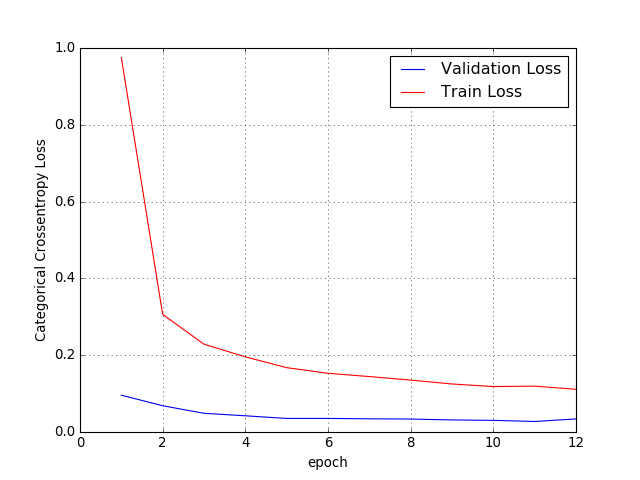

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2.4: ConvNet(64-32) | 3 Dropouts | 2 MaxPools | Dense(64-32) | 1 Flatten | ReLU | Adam | Padding: "same" | Batch Normalization

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 565us/step - loss: 0.9625 - accuracy: 0.7107 - val_loss: 0.1589 - val_accuracy: 0.9801
Epoch 2/12
60000/60000 [==============================] - 33s 553us/step - loss: 0.3423 - accuracy: 0.9082 - val_loss: 0.0498 - val_accuracy: 0.9865
Epoch 3/12
60000/60000 [==============================] - 33s 547us/step - loss: 0.2330 - accuracy: 0.9379 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 4/12
60000/60000 [==============================] - 33s 552us/step - loss: 0.1890 - accuracy: 0.9484 - val_loss: 0.0319 - val_accuracy: 0.9907
Epoch 5/12
60000/60000 [==============================] - 33s 549us/step - loss: 0.1635 - accuracy: 0.9544 - val_loss: 0.0292 - val_accuracy: 0.9915
Epoch 6/12
60000/60000 [==============================] - 33s 550us/step - loss: 0.1497 - accuracy: 0.9583 - val_loss: 0.0254 - val_accuracy: 0.9927
Epoch 7/12
60000/60000 [==============================]

Test loss: 0.025404230587064557
Test accuracy: 0.9926999807357788


<IPython.core.display.Javascript object>


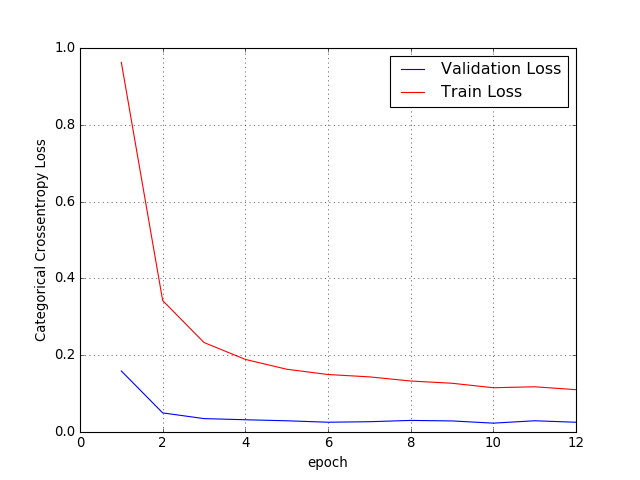

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3) ConvNet with 7 x 7 kernel

## 3.1: ConvNet (128-64-32) | Dense (128) | 3 Dropouts | 2 Maxpool | 1 Flatten | ReLU | Adam

In [7]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 322s 5ms/step - loss: 0.4152 - accuracy: 0.8676 - val_loss: 0.0499 - val_accuracy: 0.9861
Epoch 2/12
60000/60000 [==============================] - 322s 5ms/step - loss: 0.1240 - accuracy: 0.9655 - val_loss: 0.0368 - val_accuracy: 0.9894
Epoch 3/12
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0904 - accuracy: 0.9753 - val_loss: 0.0338 - val_accuracy: 0.9904
Epoch 4/12
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0792 - accuracy: 0.9786 - val_loss: 0.0292 - val_accuracy: 0.9917
Epoch 5/12
60000/60000 [==============================] - 319s 5ms/step - loss: 0.0649 - accuracy: 0.9822 - val_loss: 0.0287 - val_accuracy: 0.9917
Epoch 6/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0624 - accuracy: 0.9832 - val_loss: 0.0228 - val_accuracy: 0.9932
Epoch 7/12
60000/60000 [==============================] - 32

Test loss: 0.016798403310499272
Test accuracy: 0.9947999715805054


<IPython.core.display.Javascript object>


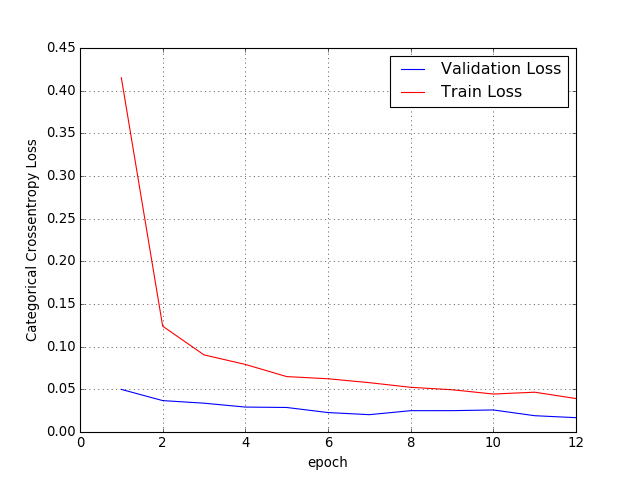

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3.2: ConvNet(128-64) | 3 Dropouts | 2 MaxPools | 1 Flatten | ReLU | Dense(64-10) | Adam | padding: "same"

In [9]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape, padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(7, 7), 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 278s 5ms/step - loss: 0.3881 - accuracy: 0.8764 - val_loss: 0.0510 - val_accuracy: 0.9845
Epoch 2/12
60000/60000 [==============================] - 279s 5ms/step - loss: 0.1318 - accuracy: 0.9625 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 3/12
60000/60000 [==============================] - 278s 5ms/step - loss: 0.0972 - accuracy: 0.9720 - val_loss: 0.0303 - val_accuracy: 0.9899
Epoch 4/12
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0240 - val_accuracy: 0.9918
Epoch 5/12
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0700 - accuracy: 0.9791 - val_loss: 0.0236 - val_accuracy: 0.9920
Epoch 6/12
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0598 - accuracy: 0.9824 - val_loss: 0.0210 - val_accuracy: 0.9927
Epoch 7/12
60000/60000 [==============================] - 277s

Test loss: 0.024228806743490226
Test accuracy: 0.993399977684021


<IPython.core.display.Javascript object>


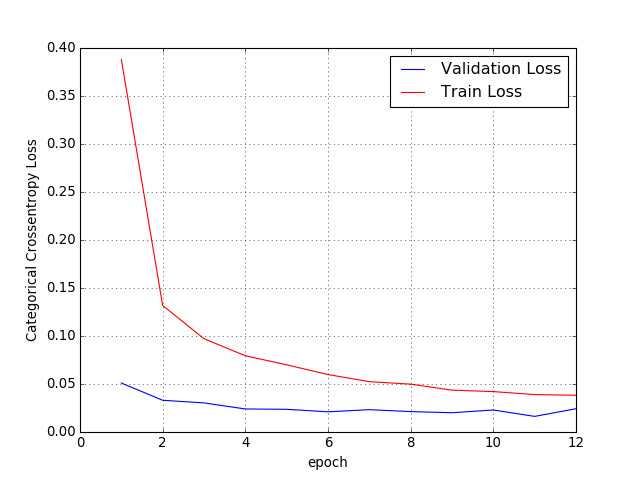

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3.3: ConvNet(256-64-32) | 3 Dropouts | 3 MaxPools | Dense(128-32) | 1 Flatten | ReLU | Adam | Padding: "same"

In [11]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (7, 7), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Conv2D(32, (7, 7), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 561s 9ms/step - loss: 0.9087 - accuracy: 0.6829 - val_loss: 0.0773 - val_accuracy: 0.9769
Epoch 2/12
60000/60000 [==============================] - 558s 9ms/step - loss: 0.2679 - accuracy: 0.9274 - val_loss: 0.0624 - val_accuracy: 0.9827
Epoch 3/12
60000/60000 [==============================] - 557s 9ms/step - loss: 0.2020 - accuracy: 0.9488 - val_loss: 0.0402 - val_accuracy: 0.9890
Epoch 4/12
60000/60000 [==============================] - 558s 9ms/step - loss: 0.1746 - accuracy: 0.9567 - val_loss: 0.0382 - val_accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 562s 9ms/step - loss: 0.1573 - accuracy: 0.9624 - val_loss: 0.0371 - val_accuracy: 0.9905
Epoch 6/12
60000/60000 [==============================] - 559s 9ms/step - loss: 0.1367 - accuracy: 0.9657 - val_loss: 0.0351 - val_accuracy: 0.9908
Epoch 7/12
60000/60000 [==============================] - 558s

Test loss: 0.022369634967670984
Test accuracy: 0.9926999807357788


<IPython.core.display.Javascript object>


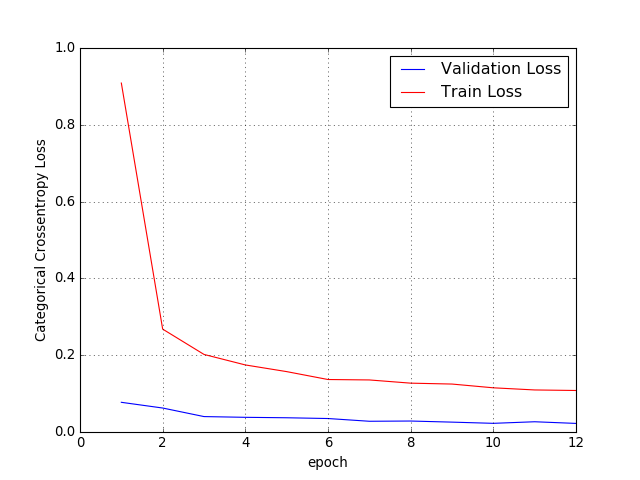

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3.4: ConvNet(64-32) | 2 Dropouts | 2 MaxPools | Dense(64-32) 1 Flatten | ReLU | Adam | Padding: "same" | 2 Batch Normalization

In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 42s 705us/step - loss: 0.9177 - accuracy: 0.7233 - val_loss: 0.0872 - val_accuracy: 0.9808
Epoch 2/12
60000/60000 [==============================] - 41s 676us/step - loss: 0.2229 - accuracy: 0.9441 - val_loss: 0.0513 - val_accuracy: 0.9840
Epoch 3/12
60000/60000 [==============================] - 41s 683us/step - loss: 0.1476 - accuracy: 0.9631 - val_loss: 0.0375 - val_accuracy: 0.9872
Epoch 4/12
60000/60000 [==============================] - 40s 671us/step - loss: 0.1138 - accuracy: 0.9717 - val_loss: 0.0474 - val_accuracy: 0.9867
Epoch 5/12
60000/60000 [==============================] - 40s 665us/step - loss: 0.0968 - accuracy: 0.9755 - val_loss: 0.0309 - val_accuracy: 0.9903
Epoch 6/12
60000/60000 [==============================] - 40s 671us/step - loss: 0.0846 - accuracy: 0.9786 - val_loss: 0.0284 - val_accuracy: 0.9920
Epoch 7/12
60000/60000 [==============================] 

Test loss: 0.03136349078471503
Test accuracy: 0.9919999837875366


<IPython.core.display.Javascript object>


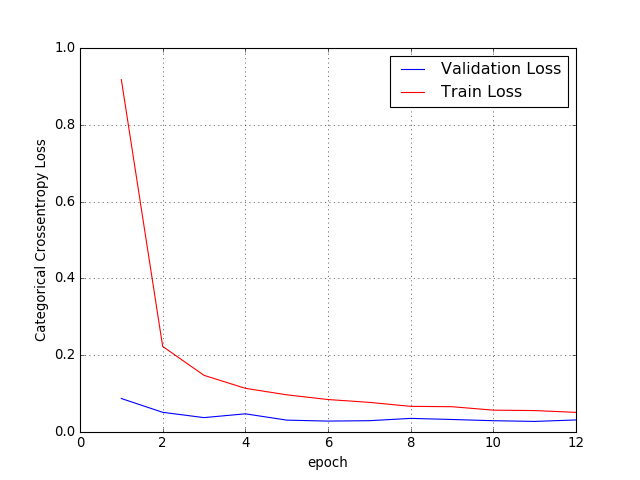

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion:

In [11]:
from prettytable import PrettyTable

In [12]:
x = PrettyTable()
x.field_names = ["convolution kernel", "architecture", "Test Accuracy"]

In [14]:
x.add_row(["3x3", "ConvNet(32-64)|2 Dropouts|Maxpool|Dense(128-10)|1 Flatten|ReLU|Adadelta", 0.9914])
x.add_row(["3x3", "ConvNet(32-32-64)|1 Dropouts|3 MaxPools|Dense(64-10)|1 Flatten|ReLU|Adam", 0.9843])
x.add_row(["3x3", "ConvNet(32-64)|2 Dropouts|2 MaxPools|Dense(128-10)|1 Flatten|ReLU|Adam|Padding:(same)", 0.9933])
x.add_row(["3x3", "ConvNet(32-32)|2 Dropouts|2 MaxPools|Dense(64-10)|1 Flatten|ReLU|Adam|Padding: (same)|BN", 0.9933])

x.add_row(["5x5", "ConvNet(128-64-32) | 3 Dropouts | 2 Maxpool | Dense(128-10) | 1 Flatten | ReLU | Adam", 0.9944])
x.add_row(["5x5", "ConvNet(64-32) | 3 Dropouts | 3 MaxPools | Dense(128-32) | 1 Flatten | ReLU | Adam", 0.9918])
x.add_row(["5x5", "ConvNet(128-64-32) | 3 Dropouts | 3 MaxPools | Dense(64-32) | 1 Flatten | ReLU | Adam | Padding: (same)", 0.9917])
x.add_row(["5x5", "ConvNet(64-32) | 3 Dropouts | 2 MaxPools | Dense(64-32) | 1 Flatten | ReLU | Adam | Padding: (same) | Batch Normalization", 0.9927])

x.add_row(["7x7", "ConvNet (128-64-32) | Dense (128) | 3 Dropouts | 2 Maxpool | 1 Flatten | ReLU | Adam", 0.9947])
x.add_row(["7x7", "ConvNet(128-64) | 3 Dropouts | 2 MaxPools | 1 Flatten | ReLU | Dense(64-10) | Adam | padding: (same)", 0.9933])
x.add_row(["7x7", "ConvNet(256-64-32) | 3 Dropouts | 3 MaxPools | Dense(128-32) | 1 Flatten | ReLU | Adam | Padding: (same)", 0.9926])
x.add_row(["7x7", "ConvNet(64-32) | 2 Dropouts | 2 MaxPools | Dense(64-32) 1 Flatten | ReLU | Adam | Padding: (same) | 2 Batch Normalization", 0.9919])
print(x)


+--------------------+---------------------------------------------------------------------------------------------------------------------------+---------------+
| convolution kernel |                                                        architecture                                                       | Test Accuracy |
+--------------------+---------------------------------------------------------------------------------------------------------------------------+---------------+
|        3x3         |                    ConvNet(32-64) | 2 Dropouts | Maxpool | Dense(128-10) | 1 Flatten | ReLU | Adadelta                    |     0.9914    |
|        3x3         |                    ConvNet(32-32-64) | 1 Dropouts | 3 MaxPools | Dense(64-10) |1 Flatten | ReLU | Adam                    |     0.9843    |
|        3x3         |            ConvNet(32-64) | 2 Dropouts | 2 MaxPools | Dense(128-10) | 1 Flatten | ReLU | Adam | Padding: (same)           |     0.9933    |
|        3x3         |

# Procedure Followed:

- Splitted the MNIST dataset into train and test 
- Tried different architectures of CNN with dataset like with muktiple dropout, diffent kernel size, different convolution layers, etc.
- Plotted the epoch vs Train/Test loss of each model